# week 12 - scaling of CSV file I/O

In [72]:
# Importing required libraries
import csv
import random
import string 
import os
import time
import pandas

In [73]:
# Function to get the size of a file when its path is passed as an argument
def get_file_size_in_bytes(file_path):
    size = os.path.getsize(file_path)
    return (size)



In [74]:
# Function to generate random list of strings
def genListOfString():
    listOfStrings=[]
    for i in range(10):
        # Specifing the length of list between 3 to 25 charrecters
        num_char = random.randint(3, 25)
        rand_string = ""
        # Generating a random string
        for j in range(num_char):
            rand_string += random.choice(string.ascii_letters)
        listOfStrings.append(rand_string)
    return listOfStrings

In [75]:
timetowritefiles = []
filenames=[]
# Function to write a csv file with specific size when the size is passed as an argument. 
def writecsvFile(size):
    for i in range(3):
        # Using global function to use the lists outside the function
        global timetowritefiles
        global filenames
        list2=['col1','col2','col3','col4','col5','col6','col7','col8','col9','col10']
        # Creating name of the file
        fileName= 'csvfile' + str(size) + "MB"+"-file"+str(i)+".csv"
        # Adding names of each file to a list named filename  
        filenames.append(fileName)
        # Opening a new csv file 
        with open(fileName,'w',newline='') as f:
            # Creating a writer object to write the rows
            thewriter = csv.writer(f)
            start = time.time()
            thewriter.writerow(list2)
            # Generating a list of 10 strings using genListOfString
            a=genListOfString()
            b=genListOfString()
            # Using while loop to create the csv file of desired size
            while (get_file_size_in_bytes(fileName) <= size*1048576): 
                thewriter.writerow(a)
                thewriter.writerow(b)
        end = time.time()
        exe = end - start
        timetowritefiles.append(exe)

In [76]:
# Calling writecsvFile function to create the csv files of sizes(MB) as specified in the below list
listofsizes= [0.1, 1, 5, 10, 100, 500]
for i in listofsizes:
    writecsvFile(i)

In [77]:
# Time taken to write each csv file
timetowritefiles

[0.05375790596008301,
 0.043363332748413086,
 0.03577733039855957,
 0.23160433769226074,
 0.2790842056274414,
 0.23226237297058105,
 1.280259370803833,
 1.4385161399841309,
 1.3071320056915283,
 2.703495979309082,
 2.3808035850524902,
 2.7539710998535156,
 33.72778272628784,
 32.63761234283447,
 26.99630832672119,
 158.85650444030762,
 149.26687479019165,
 116.47921943664551]

In [80]:
# Function for loading a csv file into a dataframe and calculating the time taken for it.
timetoreadfiles=[]
def loadToDataFrame(a):
    global timetoreadfiles
    start= time.time()
    df=pandas.read_csv(a)
    end=time.time()
    timetoreadfiles.append(end-start)
    

In [81]:
# Calling loadToDataFrame function
for i in filenames:
    loadToDataFrame(i)

In [82]:
# Time taken to load each csv file into a dataframe
timetoreadfiles

[0.02646923065185547,
 0.02547430992126465,
 0.01988697052001953,
 0.041069984436035156,
 0.04402637481689453,
 0.04529213905334473,
 0.1427597999572754,
 0.13658356666564941,
 0.15143060684204102,
 0.2844576835632324,
 0.2726900577545166,
 0.2766270637512207,
 2.3151090145111084,
 2.356253147125244,
 2.1209828853607178,
 11.199040412902832,
 10.828109979629517,
 9.511391878128052]

In [85]:
#Names of each csv file generated
filenames

['csvfile0.1MB-file0.csv',
 'csvfile0.1MB-file1.csv',
 'csvfile0.1MB-file2.csv',
 'csvfile1MB-file0.csv',
 'csvfile1MB-file1.csv',
 'csvfile1MB-file2.csv',
 'csvfile5MB-file0.csv',
 'csvfile5MB-file1.csv',
 'csvfile5MB-file2.csv',
 'csvfile10MB-file0.csv',
 'csvfile10MB-file1.csv',
 'csvfile10MB-file2.csv',
 'csvfile100MB-file0.csv',
 'csvfile100MB-file1.csv',
 'csvfile100MB-file2.csv',
 'csvfile500MB-file0.csv',
 'csvfile500MB-file1.csv',
 'csvfile500MB-file2.csv']

In [86]:
# Creating a table with file name, its write time and read time.
df = pandas.DataFrame(list(zip(filenames, timetowritefiles,timetoreadfiles)), 
               columns =['Name Of The File', 'Write Time','Read Time']) 

In [87]:
df

,Name Of The File,Write Time,Read Time
0,csvfile0.1MB-file0.csv,0.053758,0.026469
1,csvfile0.1MB-file1.csv,0.043363,0.025474
2,csvfile0.1MB-file2.csv,0.035777,0.019887
3,csvfile1MB-file0.csv,0.231604,0.041070
4,csvfile1MB-file1.csv,0.279084,0.044026
5,csvfile1MB-file2.csv,0.232262,0.045292
6,csvfile5MB-file0.csv,1.280259,0.142760
7,csvfile5MB-file1.csv,1.438516,0.136584
8,csvfile5MB-file2.csv,1.307132,0.151431
9,csvfile10MB-file0.csv,2.703496,0.284458


In [90]:
# Calculating average write time for each file size
avgwritetime=[]
for i in range(0,18,3):
    avg= (timetowritefiles[i]+timetowritefiles[i+1]+timetowritefiles[i+2])/3
    avgwritetime.append(avg)

In [91]:
avgwritetime

[0.04429952303568522,
 0.2476503054300944,
 1.3419691721598308,
 2.612756888071696,
 31.120567798614502,
 141.53419955571493]

In [92]:
# Calculating average read time for each file size
avgreadtime=[]
for i in range(0,18,3):
    avg= (timetoreadfiles[i]+timetoreadfiles[i+1]+timetoreadfiles[i+2])/3
    avgreadtime.append(avg)

In [93]:
avgreadtime

[0.023943503697713215,
 0.04346283276875814,
 0.14359132448832193,
 0.2779249350229899,
 2.26411501566569,
 10.512847423553467]

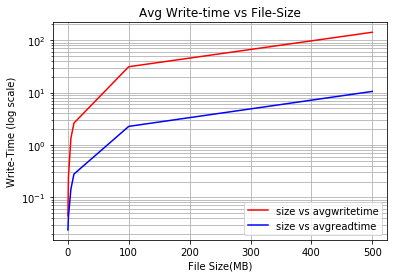

In [128]:
# Plotting the average write times and average load times versus file size
import matplotlib.pyplot as plt
plt.grid(True, which="both")
line1,=plt.semilogy(listofsizes, avgwritetime,color = "r" )
line2,=plt.semilogy(listofsizes, avgreadtime,color = "b" )
plt.title('Avg Write-time vs File-Size')
plt.xlabel('File Size(MB)')
plt.ylabel('Write-Time (log scale)')
plt.legend((line1,line2), ('size vs avgwritetime', 'size vs avgreadtime'))
plt.show()
